In [ ]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras.backend as kb
from scipy import signal

In [ ]:
# Constants
pi = math.pi

f = 10 * 10**9  # 10 Ghz X band mid frequency.
c = 3 * 10**8
l = c/f # wavelength lambda.
d = 0.50*l

print("wavelength lambda =", l,"m")

wavelength lambda = 0.03 m


In [ ]:
# Function to find nCr
def C(n,r):
    return math.factorial(n)//(math.factorial(r)*math.factorial(n-r))

# Function to find cosh inverse of x
def cosh_inverse(x):
    return math.log(x + math.sqrt(x**2-1))

def binomial_coefficients(N):
    m = N//2
    coeffs = [C(N-1,i+m) for i in range(m)]
    return coeffs

def dolph_chebyshev_coefficients(N, RoDb):

    Ro = pow(10, RoDb/20)

    window = signal.chebwin(N, RoDb)

    coeffs_normalized = window[N//2:]

    zo = math.cosh(cosh_inverse(Ro)/(N-1))

    normalization_factor = (zo**(N-1))/coeffs_normalized[-1]

    coeffs = [normalization_factor*i for i in coeffs_normalized]

    return coeffs


In [ ]:
# Finding array factor from n and theta.
def array_factor2m(n, theta, coefficients):
    m = n//2
    u = (pi * d/l)*(math.cos(theta))

    AF = 0
    for i in range(1,m+1):
        AF += (coefficients[i-1] * math.cos((2*i-1) * u))
    return AF

In [ ]:
# Plotting graph for theta vs Array factor in polar and linear.
def get_AF(n,coefficients, plot_number):
  rads = np.arange(0, 2*(np.pi), 0.001)
  AF_actual = [array_factor2m(n, rad, coefficients) for rad in rads]
  thetas = [rad*180/pi for rad in rads]

  normalizing_factor = max(AF_actual)

  for i in range(len(AF_actual)):
    AF_actual[i]/=normalizing_factor

  plt.grid()
  
  f1 = plt.figure(plot_number)
  plt.axes(projection = 'polar')
  plt.polar(rads,AF_actual,'.g')

  f2 = plt.figure(plot_number + 1)
  plt.plot(thetas, AF_actual)
  #plt.show()
  return AF_actual, normalizing_factor

/usr/local/lib/python3.6/dist-packages/scipy/signal/windows/windows.py:1439: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  warnings.warn("This window is not suitable for spectral analysis "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


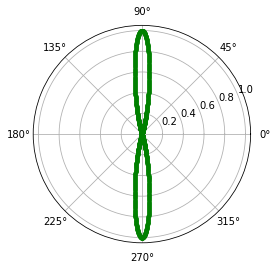

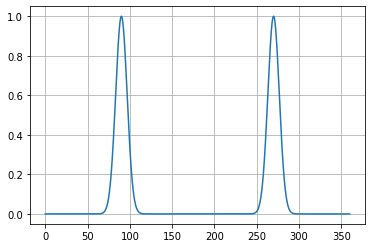

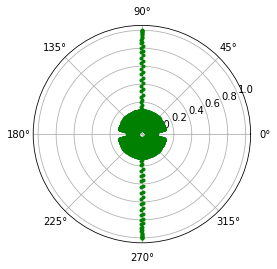

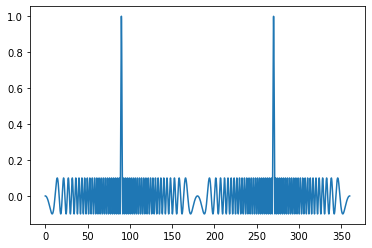

In [ ]:
N_binomial = 30
N_chebyshev = 100
RoDb = 20

coeffs_binomial = binomial_coefficients(N_binomial)
coeffs_dolph = dolph_chebyshev_coefficients(N_chebyshev, RoDb)

AF_binomial, normalizing_factor_binomial = get_AF(N_binomial, coeffs_binomial,1)
AF_chebyshev, normalizing_factor_chebyshev = get_AF(N_chebyshev, coeffs_dolph,3)

In [ ]:
# Function to find cos() terms in array factor expression after removing some elements.
def array_factor_suffix(indices, theta):
    u = (pi * d/l)*(math.cos(theta))
    AF_s = []
    for i in indices:
        AF_s.append([math.cos(i*u)])
    
    return AF_s

In [ ]:
def make_model(N,remaining_coeffs):
  # Make the model.
  model = Sequential()
  initializer = keras.initializers.GlorotNormal(seed = 7)

  model.add(Dense(N//2, input_dim = remaining_coeffs, activation='sigmoid', kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(N//2, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  model.add(Dense(remaining_coeffs, activation='sigmoid',kernel_initializer=initializer , bias_initializer=initializer))
  print(model.summary())
  return model

In [ ]:
f_indices = None
rads = np.arange(0, 2*(np.pi), 0.001)

In [ ]:
def plot_AF_unequal(y_pred, f_indices):
    global rads
    AFs = []
  
    for rad in rads:
      suffix = array_factor_suffix(f_indices, rad)
      AF = 0
      for i in range(len(suffix)):
        AF+=suffix[i][0]*y_pred[i]
      AFs.append(AF)
    f1 = plt.figure(1)
    plt.polar(rads, AFs)
    f2 = plt.figure(2)
    plt.plot(rads, AFs)
    
    

In [ ]:
def train_model(N, AF_actual, coefficients):
  global f_indices
  global rads
  # Remove r elements on both sides symmetrically.
  r = 5
  indices = [i for i in range(1,N//2+1)]
  rem = random.sample(indices, r)
  f_indices = [indices[i] for i in range(len(indices)) if indices[i] not in rem]
  f_indices = [2*i-1 for i in f_indices]
  print(indices, rem, f_indices)
  remaining_coeffs = N//2 - r

  # Function to find custom loss to be used in the neural net,
  def custom_loss(y_actual, y_pred):
      global f_indices
      global rads
      
      l = 0
      for i in range(len(rads)):
          suffix_tensor = tf.constant(array_factor_suffix(f_indices, rads[i]))
          l += (kb.dot(y_pred, suffix_tensor) - AF_actual[i])**2
      
      #l += tf.cast(remaining_coeffs - tf.math.count_nonzero(y_pred),tf.float32)*1000
      return l

  

  model = make_model(N, remaining_coeffs)

  # Give dummy input and output as loss doesnt depend on input and true output, only depends on predicted output. 
  X = [[coefficients[i] for i in range(len(coefficients)) if i not in rem]]
  print(X,"this is X")
  #X = [[1 for i in range(remaining_coeffs)]]
  Y = [[1 for i in range( remaining_coeffs )]]
  optimizer = keras.optimizers.Adam(lr=0.01)
  model.compile(loss=custom_loss, optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(X, Y, epochs=300)

  # Predict the output (the coefficients after removing elements.)
  y_predicted = model.predict(X)[0]
  print(y_predicted)

  # Plot the Array factor for unequally spaced array,
  

  plot_AF_unequal(y_predicted,f_indices)
  

  return y_predicted, f_indices



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] [17, 20, 19, 33, 3] [1, 3, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 35, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                2300      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550    

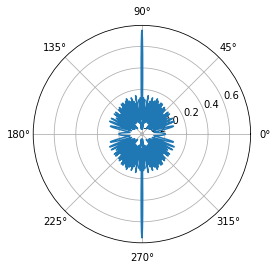

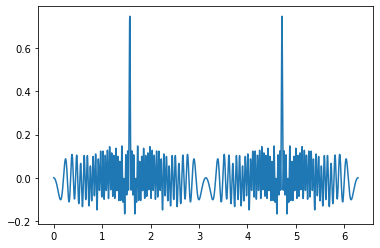

In [ ]:
y_predicted, f_indices = train_model(N_chebyshev, AF_chebyshev, coeffs_dolph)

In [ ]:

coefficients = []

j = 0
for i in range(1,N_chebyshev//2+1):
  if 2*i-1 in f_indices:
    coefficients.append(str(y_predicted[j]*normalizing_factor_chebyshev))
    j+=1
  else:
    coefficients.append("0")

print("[", ",".join(coefficients),"]")
print(coeffs_dolph)
print(coefficients.count("0"), len(coefficients))


[ 0.22764331478772037,0.16188713281824293,0,0.1967498112556485,0.23405110498615833,0.2161690063240729,0.2381992502373401,0.23036953039829935,0.2347804882947057,0.22082465635097853,0.22954986111299114,0.17830256856493604,0.15884934864512096,0.1641889037719828,0.18709232184086222,0.16435217463796095,0,0.13345648286284673,0,0,0.17004389721955615,0.15838607431387047,0.15101998264963598,0.18560379511839126,0.19489636008709085,0.17782962871760907,0.18621009673955985,0.1707391066899525,0.0976188723125226,0.11222158614626362,0.15813639112690012,0.08050511699681122,0,0.07052749228076284,0.13266024174560062,0.07434463550885087,0.12450817973891037,0.10965101514186837,0.08751765376710681,0.10976725274994442,0.09668333788603917,0.07422726653256355,0.09747805188899186,0.07305168650016869,0.09274500324009408,0.08532476420015163,0.0738429691517975,0.07746040028349756,0.05128644347516844,1.039231074008577 ]
[0.2375444634599154, 0.23737996626333369, 0.2370512289895952, 0.2365587653458769, 0.235903344565

In [ ]:
#y_predicted, f_indices = train_model(N_binomial, AF_binomial, coeffs_binomial)

In [ ]:
'''
coefficients = []

j = 0
for i in range(1,N_binomial//2+1):
  if 2*i-1 in f_indices:
    coefficients.append((y_predicted[j]*normalizing_factor_binomial))
    j+=1
  else:
    coefficients.append(0)

print(coefficients)
print(coeffs_binomial)
print(coefficients.count(0), len(coefficients))

'''

'\ncoefficients = []\n\nj = 0\nfor i in range(1,N_binomial//2+1):\n  if 2*i-1 in f_indices:\n    coefficients.append((y_predicted[j]*normalizing_factor_binomial))\n    j+=1\n  else:\n    coefficients.append(0)\n\nprint(coefficients)\nprint(coeffs_binomial)\nprint(coefficients.count(0), len(coefficients))\n\n'